In [58]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train=pd.read_csv("train.csv",sep=",",dtype='unicode')
plt.rc('font',family='Malgun Gothic') # 한글 폰트 지원

train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175,nursing_hospital,4217530010,0,3961134739,...,758993742,222876855,0,536116887,3.90E+08,2619290493,1271224493,62,64,same
1,3,open,gyeongnam,32,19970401,410,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801,813,same
2,4,open,gyeonggi,89,20161228,468,nursing_hospital,1004521989,515483669,447219722,...,0,0,0,0,0,0,0,234,1,same
3,7,open,incheon,141,20000814,353,general_hospital,72507342181,0,70677397660,...,37755010512,17018596586,9219427379,20736413926,1.51E+10,12954271998,7740829037,663,663,same
4,9,open,gyeongnam,32,20050901,196,general_hospital,49043538016,0,47656051197,...,51432592890,30072585842,17593752360,21360007048,14108027465,5561941,9025549604,206,197,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214,nursing_hospital,7614696536,415347464,5903119133,...,9423771130,2618201328,0,6805569802,5.93E+09,5379501732,811641602,193,141,same
297,423,close,choongnam,159,20140618,NaN,hospital,6717143911,8.20E+09,0,...,0,0,0,0,0,0,0,79,79,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0,0,54794278,...,6370097200,2170972735,0,4199124465,2498749346,3259161079,0,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180,nursing_hospital,2116892231,268174808,3286244912,...,639233573,6.40E+09,0,0,0,0,0,100,NaN,NaN


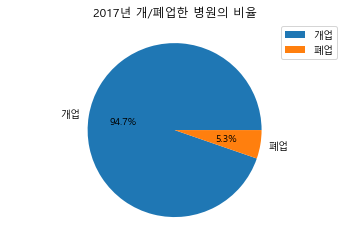

In [63]:
# 17년도 개업한 병원과 폐업한 병원의 비율을 pie chart로 출력
f=open('train.csv','r', encoding='cp949')
data=csv.reader(f)
O=0
C=0
size=[]
label=['개업', '폐업']
plt.axis('equal')
for row in data:
    if row[1] == 'open' : O+=1
    else : C+=1
size.append(O)
size.append(C)
plt.title('2017년 개/폐업한 병원의 비율')
plt.pie(size, labels=label, autopct='%.1f%%')
plt.legend()
plt.show()
f.close()

['58', '107', '140', '164', '209', '238', '265', '281', '306', '309', '366', '414', '423', '426', '427']


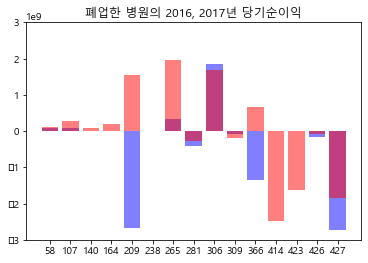

In [158]:
# 폐업한 병원의 16년도 당기순이익을 막대그래프로 출력
f=open('train.csv','r', encoding='cp949')
data=csv.reader(f)
sixteen=[] # 16년도 당기순이익
seventeen=[] # 17년도 당기순이익
hos_name=[] # 폐업한 병원의 ID번호
for row in data:
    if row[1] == ' close' : 
        hos_name.append(row[0])
        sixteen.append(int(row[39]))
        seventeen.append(int(row[15]))
print(hos_name)
plt.title('폐업한 병원의 2016, 2017년 당기순이익')
plt.bar(np.arange(len(hos_name)), sixteen, alpha=0.5, color='b')
plt.bar(np.arange(len(hos_name)), seventeen, alpha=0.5, color='r')
plt.xticks(np.arange(len(hos_name)), hos_name)
plt.ylim(-3000000000,3000000000)
plt.show()

# 209, 265, 306, 414, 423, 427번 병원의 당기순이익 수치의 폭이 매우 크므로 이들을 따로 분류